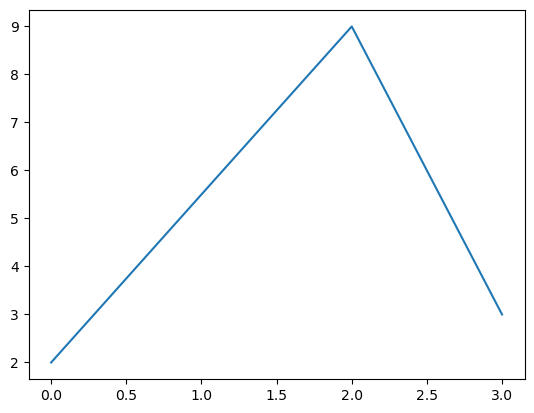

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot([0,2,3],[2,9,3])
plt.show()

In [7]:
import csv

def read_csv_with_multiple_tables(file_path):
    with open(file_path, mode='r', newline='') as file:
        reader = csv.reader(file)
        tables = {}
        current_table_name = None
        current_table_data = []

        for row in reader:
            if row and row[0].startswith('Tableau'):
                if current_table_name:
                    tables[current_table_name] = current_table_data
                current_table_name = row[0]
                current_table_data = []
            elif row:  # Assurez-vous que la ligne n'est pas vide
                current_table_data.append(row)

        if current_table_name:
            tables[current_table_name] = current_table_data

    return tables

def convert_columns_to_lists(tables):
    converted_tables = {}
    for table_name, table_data in tables.items():
        # Transposer les lignes en colonnes
        transposed_data = list(map(list, zip(*table_data)))
        # Convertir chaque colonne en une liste de nombres
        converted_tables[table_name] = [list(map(int, column)) for column in transposed_data]
    return converted_tables

def print_tables(tables):
    for table_name, table_data in tables.items():
        print(f"\n{table_name}:")
        for i, column in enumerate(table_data):
            print(f"Colonne {i+1}: {column}")

# Chemin absolu du fichier CSV
file_path = r'tablo.csv'

# Lire le fichier CSV et obtenir les tableaux
tables = read_csv_with_multiple_tables(file_path)

# Convertir les colonnes en listes de nombres
converted_tables = convert_columns_to_lists(tables)

# Afficher les tableaux convertis
print(converted_tables)

{'Tableau seuil = -60mV': [[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204], [5, 8, 7, 6, 8, 8, 10, 9, 5, 5, 6, 6, 8, 3, 10, 8, 5, 14, 5, 2, 5, 4, 9, 10, 13, 13, 8, 3, 12, 12, 9, 7, 5, 6, 9, 5, 10, 10, 7, 5, 9, 11, 7, 7, 8, 5, 7, 4, 11, 3, 6, 8, 12, 6, 5, 8, 6, 7, 4, 7, 6, 11, 12, 9, 11, 6, 11, 5, 13, 12, 6, 8, 11, 8, 5, 9, 12, 9, 9, 15, 11, 9, 5, 9, 10, 7, 9, 10, 8, 8, 11, 8, 13, 9, 10, 11, 9, 7, 10, 10, 10, 7]], 'Tableau seuil = -100mV': [[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 7

Moyenne de coups du bruit =  8.137254901960784

 incertitude sur la mesure Y= 
 [2.23606798 2.82842712 2.64575131 2.44948974 2.82842712 2.82842712
 3.16227766 3.         2.23606798 2.23606798 2.44948974 2.44948974
 2.82842712 1.73205081 3.16227766 2.82842712 2.23606798 3.74165739
 2.23606798 1.41421356 2.23606798 2.         3.         3.16227766
 3.60555128 3.60555128 2.82842712 1.73205081 3.46410162 3.46410162
 3.         2.64575131 2.23606798 2.44948974 3.         2.23606798
 3.16227766 3.16227766 2.64575131 2.23606798 3.         3.31662479
 2.64575131 2.64575131 2.82842712 2.23606798 2.64575131 2.
 3.31662479 1.73205081 2.44948974 2.82842712 3.46410162 2.44948974
 2.23606798 2.82842712 2.44948974 2.64575131 2.         2.64575131
 2.44948974 3.31662479 3.46410162 3.         3.31662479 2.44948974
 3.31662479 2.23606798 3.60555128 3.46410162 2.44948974 2.82842712
 3.31662479 2.82842712 2.23606798 3.         3.46410162 3.
 3.         3.87298335 3.31662479 3.         2.23606798 3.
 3.162

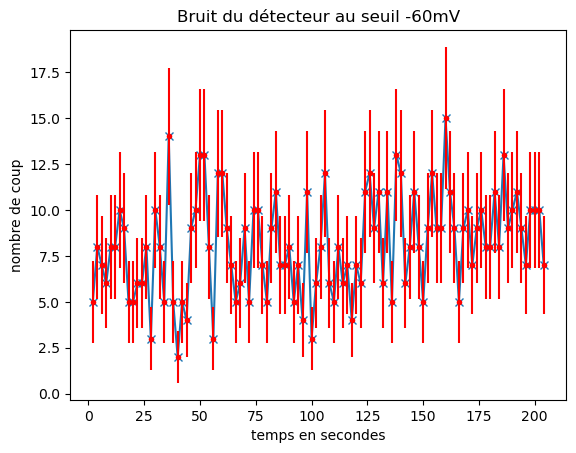

In [22]:
#Graphique 1ère mesure de bruit de fond avec signal seuil = -60mV:
x,y = converted_tables['Tableau seuil = -60mV']
Y = np.array(y)
Yerr = np.sqrt(y)
print("Moyenne de coups du bruit = ",np.mean(y))
print("\n incertitude sur la mesure Y= \n",Yerr)
plt.plot(x,y,'-x')
plt.matplotlib.pyplot.errorbar(x, y, yerr = Yerr, xerr=None, fmt='r.')
plt.xlabel("temps en secondes")
plt.ylabel("nombre de coup")
plt.title("Bruit du détecteur au seuil -60mV")
plt.show()


Moyenne de coups du bruit =  14.697368421052632

 incertitude sur la mesure Y= 
 [3.87298335 4.79583152 4.12310563 3.         3.74165739 3.87298335
 3.16227766 4.12310563 4.         4.58257569 4.         4.
 4.12310563 3.46410162 4.35889894 3.87298335 3.16227766 4.47213595
 4.35889894 4.35889894 3.74165739 3.60555128 4.12310563 2.64575131
 3.31662479 3.60555128 3.74165739 4.24264069 3.60555128 4.
 3.31662479 4.12310563 2.64575131 3.87298335 3.74165739 3.46410162
 3.46410162 3.87298335 4.12310563 4.24264069 4.         3.74165739
 4.24264069 3.46410162 4.12310563 4.         4.12310563 3.46410162
 3.87298335 3.31662479 3.60555128 3.31662479 4.35889894 3.16227766
 4.         3.60555128 3.60555128 4.58257569 2.44948974 3.60555128
 3.60555128 3.60555128 3.87298335 3.74165739 4.         3.87298335
 4.24264069 4.12310563 3.16227766 3.31662479 3.74165739 2.64575131
 4.58257569 4.24264069 3.46410162 5.09901951]


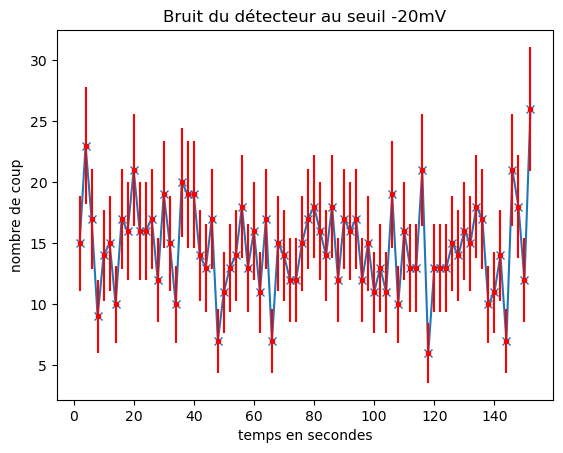

In [23]:
#Graphique bruit de fond avec signal seuil = -20mV:
x,y = converted_tables['Tableau seuil = -20mV']
Y = np.array(y)
Yerr = np.sqrt(y)
print("Moyenne de coups du bruit = ",np.mean(y))
print("\n incertitude sur la mesure Y= \n",Yerr)
plt.plot(x,y,'-x')
plt.matplotlib.pyplot.errorbar(x, y, yerr = Yerr, xerr=None, fmt='r.')
plt.xlabel("temps en secondes")
plt.ylabel("nombre de coup")
plt.title("Bruit du détecteur au seuil -20mV")
plt.show()

Moyenne de coups du bruit =  8.048780487804878

 incertitude sur la mesure Y= 
 [3.60555128 3.16227766 1.41421356 3.         3.         1.
 2.82842712 3.         3.16227766 2.23606798 3.46410162 2.82842712
 2.64575131 2.64575131 3.74165739 2.23606798 2.44948974 3.16227766
 2.23606798 2.64575131 3.         3.         3.         2.82842712
 3.60555128 2.44948974 3.74165739 2.         4.12310563 2.23606798
 3.31662479 2.64575131 2.23606798 2.44948974 3.31662479 3.
 2.         3.16227766 2.44948974 2.23606798 2.23606798]


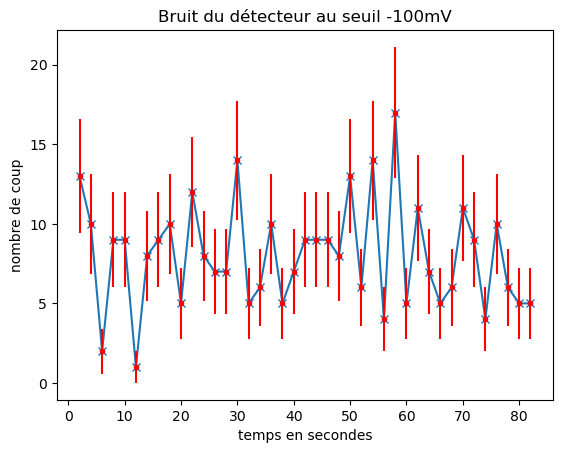

In [24]:
#Graphique bruit de fond avec signal seuil = -100mV:
x,y = converted_tables['Tableau seuil = -100mV']
Y = np.array(y)
Yerr = np.sqrt(y)
print("Moyenne de coups du bruit = ",np.mean(y))
print("\n incertitude sur la mesure Y= \n",Yerr)
plt.plot(x,y,'-x')
plt.matplotlib.pyplot.errorbar(x, y, yerr = Yerr, xerr=None, fmt='r.')
plt.xlabel("temps en secondes")
plt.ylabel("nombre de coup")
plt.title("Bruit du détecteur au seuil -100mV")
plt.show()

Moyenne de coups du bruit =  3.2653061224489797

 incertitude sur la mesure Y= 
 [2.82842712 2.         2.44948974 2.23606798 2.         1.
 2.         1.         1.73205081 2.         2.44948974 1.
 1.41421356 1.73205081 1.73205081 1.73205081 1.73205081 2.44948974
 1.73205081 2.44948974 1.73205081 1.         1.73205081 1.41421356
 2.         1.         2.64575131 1.         2.         1.41421356
 1.41421356 1.41421356 2.23606798 1.73205081 1.73205081 2.
 2.23606798 1.73205081 2.23606798 2.44948974 1.         1.41421356
 1.         1.41421356 1.41421356 0.         2.         2.44948974
 0.        ]


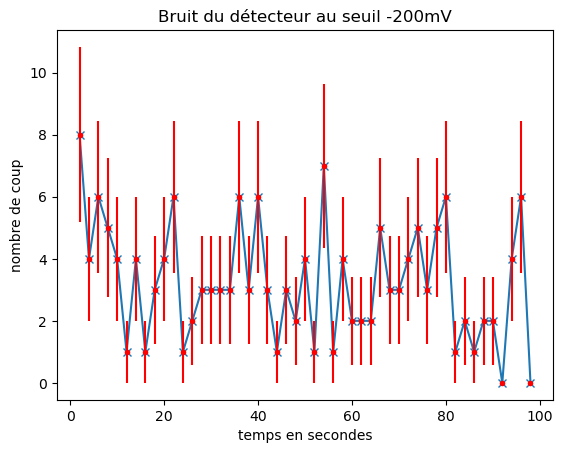

In [25]:
#Graphique bruit de fond avec signal seuil = -200mV:
x,y = converted_tables['Tableau seuil = -200mV']
Y = np.array(y)
Yerr = np.sqrt(y)
print("Moyenne de coups du bruit = ",np.mean(y))
print("\n incertitude sur la mesure Y= \n",Yerr)
plt.plot(x,y,'-x')
plt.matplotlib.pyplot.errorbar(x, y, yerr = Yerr, xerr=None, fmt='r.')
plt.xlabel("temps en secondes")
plt.ylabel("nombre de coup")
plt.title("Bruit du détecteur au seuil -200mV")
plt.show()

[43.28972164 41.58124577 39.11521443 38.52272057 35.98610843 36.22154055
 34.3220046  32.77193922 32.44996148 31.79622619 29.3257566  28.7923601
 28.24889378 27.94637722 27.64054992 27.23967694 26.81417536 26.07680962
 25.25866188 24.41311123 24.14539294 23.64318084 23.70653918 23.15167381
 22.91287847 23.06512519 22.3159136  21.56385865 21.97726098 21.23676058
 20.92844954 20.5669638  20.0748599  20.49390153 20.0748599  20.14944168
 18.49324201 18.81488772 19.07878403 18.13835715 18.60107524 18.54723699
 17.40689519 18.38477631 17.34935157 16.73320053 16.70329309 16.34013464
 15.77973384 16.21727474 17.23368794 15.90597372 15.74801575 15.58845727
 16.0623784  15.77973384 14.49137675 15.06651917 14.93318452 14.96662955
 14.69693846 14.31782106 13.3041347  14.83239697 13.74772708 12.80624847
 13.03840481 12.80624847 13.82027496 12.40967365 14.03566885 12.20655562
 12.36931688 12.64911064 12.4498996  12.489996   12.24744871 12.60952021
 12.04159458 12.16552506 11.         10.67707825 10.

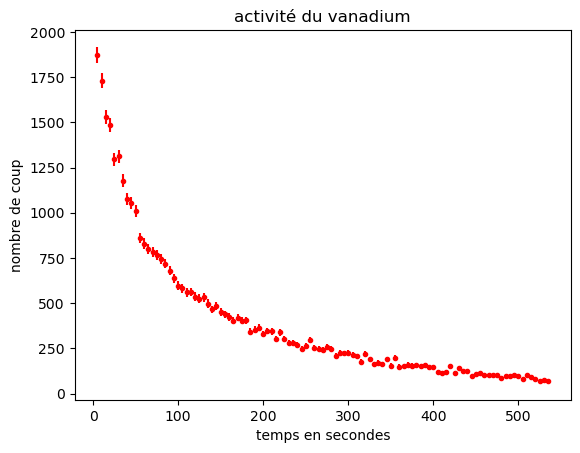

In [12]:
#Graphique vanadium:
x,y = converted_tables['Tableau vanadium']
Y = np.array(y)
Yerr = np.sqrt(y)
plt.matplotlib.pyplot.errorbar(x, y, yerr = Yerr, xerr=None, fmt='r.')
print(Yerr)
plt.xlabel("temps en secondes")
plt.ylabel("nombre de coup")
plt.title("activité du vanadium")
plt.show()

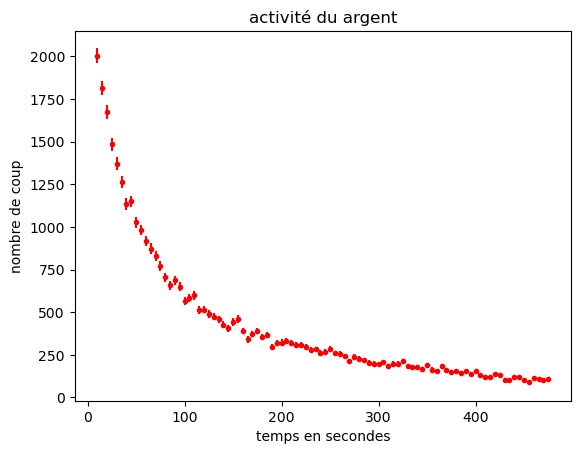

In [13]:
#Graphique argent:
x,y = converted_tables['Tableau argent']
Y = np.array(y)
Yerr = np.sqrt(y)
plt.matplotlib.pyplot.errorbar(x, y, yerr = Yerr, xerr=None, fmt='r.')

plt.xlabel("temps en secondes")
plt.ylabel("nombre de coup")
plt.title("activité du argent")
plt.show()

[14.56021978 13.74772708 14.4222051  14.17744688 13.49073756 12.489996
 14.69693846 13.19090596 13.3041347  12.40967365 13.03840481 12.80624847
 13.07669683 13.41640786 11.61895004 12.92284798 13.3041347  12.16552506
 12.4498996  12.60952021 13.26649916 11.22497216 12.20655562 12.20655562
 12.32882801 12.36931688 12.4498996  12.20655562 11.87434209 12.9614814
 11.91637529 11.22497216 10.63014581 11.83215957 10.53565375 12.28820573
 11.70469991 11.40175425 11.04536102 11.35781669 11.09053651 11.04536102
 11.35781669 10.95445115 11.61895004  9.94987437 11.18033989 10.63014581
 10.77032961 11.09053651 11.44552314 10.58300524 10.29563014 10.24695077
  9.8488578  10.39230485 10.72380529 10.86278049 10.81665383 10.67707825
 10.58300524 10.09950494 10.19803903  9.43398113  9.38083152 10.04987562
 10.29563014 10.34408043 10.19803903  9.8488578   9.79795897  9.94987437
  9.8488578   9.59166305 10.04987562  8.71779789  9.11043358  9.05538514
 10.14889157  8.1240384   9.43398113 10.09950494  8.06

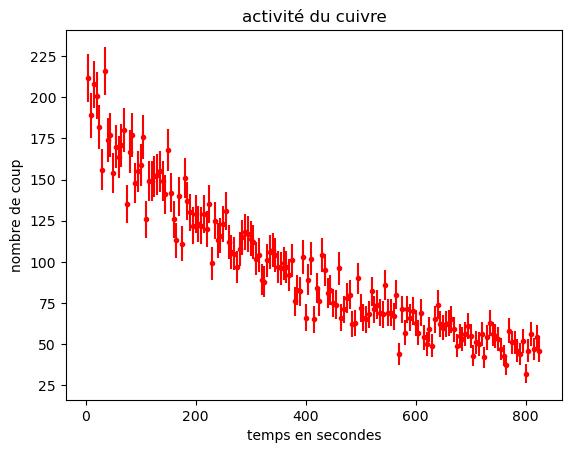

feur


In [ ]:
#Graphique cuivre:
x,y = converted_tables['Tableau cuivre']
Y = np.array(y)
Yerr = np.sqrt(y)
plt.matplotlib.pyplot.errorbar(x, y, yerr = Yerr, xerr=None, fmt='r.')
print(Yerr)
plt.xlabel("temps en secondes")
plt.ylabel("nombre de coup")
plt.title("activité du cuivre")
plt.show()